# **PERCEPTRON**
Đây là code tổng hợp tạo ra dữ liệu linearly seperable dataset và gắn nó trên mô hình 2d và 3d


# **Perceptron 2d**
Mn có thể tham khảo nguồn: https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/pla/PLA%20visualization.ipynb

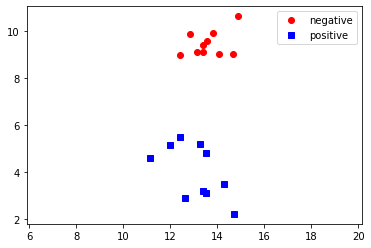


X0 [[14.71048816 13.53386205 11.96559091 14.29445989 12.60178819 13.52747324
  11.14965085 12.4195938  13.3965553  13.25382641]
 [ 2.21531943  4.79729271  5.13010377  3.50133606  2.88832769  3.12517726
   4.61037681  5.46857234  3.17086036  5.20101685]]

X1 [[13.12615231 13.37718967 13.36967847 13.55124752 14.88023648 13.83249689
  12.40861393 14.65371757 12.84223132 14.05591098]
 [ 9.09076761  9.41210542  9.11329745  9.59262765 10.6269425   9.89427339
   8.95956136  9.0067838   9.87447648  9.00855399]]


In [1]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

N=10
X, y = datasets.make_blobs(n_samples=2*N, centers=2, n_features=2, center_box=(0, 15))
#Code gốc tạo dữ liệu khá khó hiểu nên mình chuyển sang code này. Nếu cần linearly seperable thì mn có thể thu nhỏ 
# center_box = (0,5)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro', label = 'negative')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'positive')
plt.axis('equal')
plt.legend()
plt.show()

X0 = X[y == 1].T # X0 = [[x],[y]]: x,y là tọa độ điểm
X1 = X[y == 0].T
print ('\nX0',X0)
print ('\nX1',X1)

In [2]:
X = np.concatenate((X0, X1), axis = 1)
print ('X',X) #X = [x1,x2,y1,y2]
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # Tạo nhãn cho dữ liệu neg và pos
print ('\ny',y)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0) #1 là để cho w0
print ('\nx.', X)


X [[14.71048816 13.53386205 11.96559091 14.29445989 12.60178819 13.52747324
  11.14965085 12.4195938  13.3965553  13.25382641 13.12615231 13.37718967
  13.36967847 13.55124752 14.88023648 13.83249689 12.40861393 14.65371757
  12.84223132 14.05591098]
 [ 2.21531943  4.79729271  5.13010377  3.50133606  2.88832769  3.12517726
   4.61037681  5.46857234  3.17086036  5.20101685  9.09076761  9.41210542
   9.11329745  9.59262765 10.6269425   9.89427339  8.95956136  9.0067838
   9.87447648  9.00855399]]

y [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]

x. [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [14.71048816 13.53386205 11.96559091 14.29445989 12.60178819 13.52747324
  11.14965085 12.4195938  13.3965553  13.25382641 13.12615231 13.37718967
  13.36967847 13.55124752 14.88023

In [3]:
def h(w, x):    
    return np.sign(np.dot(w.T, x)) #Tính đầu ra ma trận xT và x xem neg hay pos

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    e = 0
    epochs = 5 #VD data không linearly seperabel thì sẽ stop sau số TG có hạn
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1) # INPUT: Vector (1,x,y)
            yi = y[0, mix_id[i]] # OUTPUT
            if h(w[-1], xi)[0] != yi: #W[-1] là input weight vector (w0,w1,w2)
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new) # Là bảng weight của 20 data
                
        e = e+1
        print ('e',e)
        if has_converged(X, y, w[-1]) or e == epochs:
            break
    return (w, mis_points)
# w chỉ phục vụ cho việc lập GIF, còn lúc vẽ chỉ cần array w cuối cùng là đủ

d = X.shape[0] #Số chiều dữ liệu
w_init = np.random.randn(d, 1) #Khởi tạo w bất kì
(w, m) = perceptron(X, y, w_init)
print(m)
print(w)
# print(len(w))


e 1
[1, 18, 9, 17, 5, 12, 8, 13, 3, 19, 6]
[array([[ 1.43699495],
       [-0.59368002],
       [-1.1557751 ]]), array([[ 2.43699495],
       [12.94018203],
       [ 3.64151761]]), array([[ 1.43699495],
       [ 0.09795072],
       [-6.23295887]]), array([[ 2.43699495],
       [13.35177713],
       [-1.03194202]]), array([[  1.43699495],
       [ -1.30194044],
       [-10.03872581]]), array([[ 2.43699495],
       [12.2255328 ],
       [-6.91354856]]), array([[  1.43699495],
       [ -1.14414567],
       [-16.02684601]]), array([[  2.43699495],
       [ 12.25240963],
       [-12.85598564]]), array([[  1.43699495],
       [ -1.29883789],
       [-22.44861329]]), array([[  2.43699495],
       [ 12.995622  ],
       [-18.94727723]]), array([[  1.43699495],
       [ -1.06028897],
       [-27.95583123]]), array([[  2.43699495],
       [ 10.08936187],
       [-23.34545442]])]


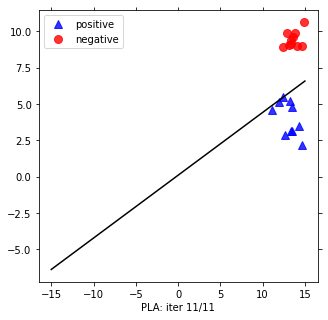

In [4]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -15, 15
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-15, 15], 'k')

## GD example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    def update(i):
        plt.cla()
        #points
        plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8, label = 'positive')
        plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8, label = 'negative')
        #plt.axis([-5 , 17, -2, 12]) #xmin, xmax, ymin, ymax 
        plt.legend()
        if i < it:
            i2 =  i
        else: 
            i2 = it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # print(X[1, m[i]], X[2, ])
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
       

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=10000)
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
#Ở Kaggle không hiện GIF mà chỉ hiện KQ cuối thôi
    
# x = np.asarray(x)
viz_alg_1d_2(w)

# **Perceptron 3D**

Phần này có tham khảo thêm cách vẽ 3d 
https://github.com/netofigueira/algorithms-sharing/blob/main/PerceptronClass.ipynb


x0. [[2.37319011 1.51261889 2.4696794  1.78736889 1.81231157 2.03717355
  1.53790057 2.29312867 1.38805594 1.57279694]
 [1.71875981 1.40558943 2.02144973 1.29380961 1.56119497 1.93397133
  1.87434722 2.76537389 1.86419379 0.90707347]
 [4.         3.         3.         2.         2.         4.
  4.         4.         3.         3.        ]]

x0. [[3.42746579 4.24760864 3.33595491 3.69420104 4.53897645 3.3071994
  4.13924705 4.47383468 4.00512009 4.28205624]
 [0.71254431 2.39846497 1.61731637 1.94273986 2.54957308 0.19362396
  2.09561534 2.41269466 1.89290099 1.79675607]
 [2.         1.         1.         2.         1.         2.
  2.         1.         2.         0.        ]]
(1, 20)


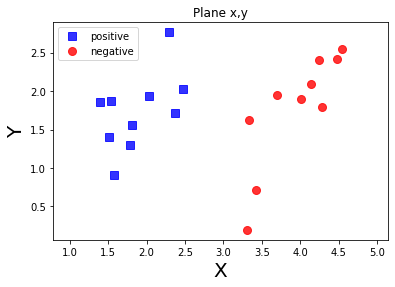

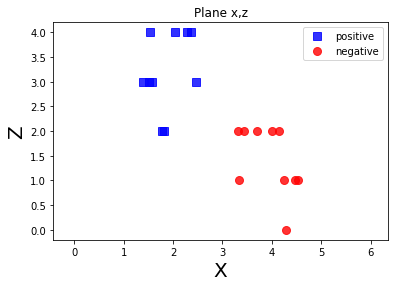

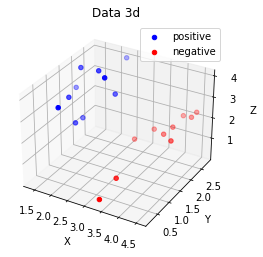

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T   
                                   
X0 = np.concatenate((X0, np.random.randint(2, 5, N) * (np.ones((1, N)))), axis = 0)
X1 = np.concatenate((X1, np.random.randint(0, 3, N) * (np.ones((1, N)))), axis = 0) 

#X0, X1 là dữ liệu 3 chiều chứa tọa độ (x,y,z)
print ('\nx0.', X0)
print ('\nx0.', X1)

print(y.shape)

plt.plot(X0[0, :], X0[1, :], 'bs', markersize = 8, alpha = .8, label = 'positive')
plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8, label = 'negative')
plt.axis('equal')
plt.legend()
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Plane x,y')
plt.show()

plt.plot(X0[0, :], X0[2, :], 'bs', markersize = 8, alpha = .8, label = 'positive')
plt.plot(X1[0, :], X1[2, :], 'ro', markersize = 8, alpha = .8, label = 'negative')
plt.axis('equal')
plt.legend()
plt.xlabel('X', fontsize = 20)
plt.ylabel('Z', fontsize = 20)
plt.title('Plane x,z')
plt.show()
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Data 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(X0[0, :], X0[1, :], X0[2, :], c= 'b', label = 'positive')
ax.scatter(X1[0, :], X1[1, :], X1[1, :], c ='r', label = 'negative')
plt.legend()
plt.show()

In [6]:
X = np.concatenate((X0, X1), axis = 1)
print ('X',X) #X = [x1,x2,y1,y2,z1,z2]
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # Tạo nhãn neg và pos
print ('\ny',y)
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0) #1 là để cho w0
print ('\nx.', X)

X [[2.37319011 1.51261889 2.4696794  1.78736889 1.81231157 2.03717355
  1.53790057 2.29312867 1.38805594 1.57279694 3.42746579 4.24760864
  3.33595491 3.69420104 4.53897645 3.3071994  4.13924705 4.47383468
  4.00512009 4.28205624]
 [1.71875981 1.40558943 2.02144973 1.29380961 1.56119497 1.93397133
  1.87434722 2.76537389 1.86419379 0.90707347 0.71254431 2.39846497
  1.61731637 1.94273986 2.54957308 0.19362396 2.09561534 2.41269466
  1.89290099 1.79675607]
 [4.         3.         3.         2.         2.         4.
  4.         4.         3.         3.         2.         1.
  1.         2.         1.         2.         2.         1.
  2.         0.        ]]

y [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]

x. [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [2.37319011 1.51261889 2.4696794  1

In [7]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    e = 0
    epochs = 5 #VD data khoong lenearly seperabel thì sẽ stop sau số TG có hạn
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(4, 1) # INPUT: Vector (1,x,y)
            yi = y[0, mix_id[i]] # OUTPUT
            if h(w[-1], xi)[0] != yi: #W[-1] là input weight vector (w0,w1,w2)
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new) # Là bảng weight của 20 data
        e = e+1
        print ('e',e)
        if has_converged(X, y, w[-1]) or e == epochs:
            break
    return (w, w_new,mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
#print ('winit',w_init)
(w,w_new, m) = perceptron(X, y, w_init)
print(m)
print('w',w)
print ('w_new',w_new) #Cái này thuận tiện cho việc show KQ thôi

e 1
[17, 2, 18, 5]
w [array([[-0.60757404],
       [ 1.25339974],
       [ 0.83861545],
       [ 0.53425887]]), array([[-1.60757404],
       [-3.22043494],
       [-1.57407921],
       [-0.46574113]]), array([[-0.60757404],
       [-0.75075553],
       [ 0.44737052],
       [ 2.53425887]]), array([[-1.60757404],
       [-4.75587562],
       [-1.44553047],
       [ 0.53425887]]), array([[-0.60757404],
       [-2.71870207],
       [ 0.48844086],
       [ 4.53425887]])]
w_new [[-0.60757404]
 [-2.71870207]
 [ 0.48844086]
 [ 4.53425887]]


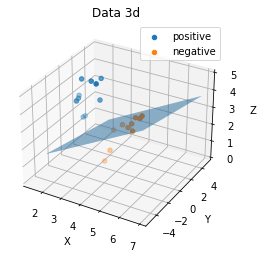

In [8]:
def draw_plane(w):
    w0, w1, w2, w3 = w[0], w[1], w[2], w[3]
    XX = np.arange(2, 7, 0.1)
    YY = np.arange(-5, 5, 0.1)
    XX, YY = np.meshgrid(XX, YY)
    Z = -(w1*XX + w2*YY + w0)/w3
    #print ('Z',Z)
    return ax.plot_surface(XX, YY, Z, alpha=0.6)
    
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Data 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(X0[0, :], X0[1, :], X0[2, :], label = 'positive')
ax.scatter(X1[0, :], X1[1, :], X1[1, :], label = 'negative')
draw_plane(w_new)
plt.legend()
plt.show()

# **Test**

w_new [[-0.60757404]
 [-2.71870207]
 [ 0.48844086]
 [ 4.53425887]]
This is possitive


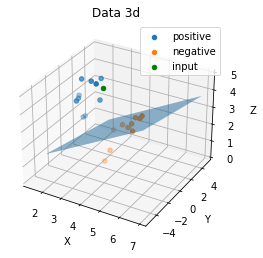

In [10]:
x,y,z = 2,4,3 #input point
print ('w_new',w_new)
w0, w1, w2, w3 = w_new[0], w_new[1], w_new[2], w_new[3]
if w1*x + w2*y + w3*z +w0 >= 0:
    print ('This is possitive')
else:
    print ('This is negative')
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Data 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(X0[0, :], X0[1, :], X0[2, :], label = 'positive')
ax.scatter(X1[0, :], X1[1, :], X1[1, :], label = 'negative')
ax.scatter(x, y, z,c='g', label = 'input')
draw_plane(w_new)
plt.legend()
plt.show()